In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [2]:
l3T = pd.read_csv('data/l3T.csv')
l3T.head()

l3_forest = l3T.copy()
l3_forest

,host,clientIp,timestamp_min,timestamp_max,time_active,count
0,www.Mfnk.de,10.70.227.68,100484,699393,598909,869
1,www.Mfnk.de,10.81.144.239,100438,698685,598247,828
2,www.Mfnk.de,100.246.106.50,100279,694277,593998,833
3,www.Mfnk.de,100.56.180.55,100294,699315,599021,824
4,www.Mfnk.de,100.71.136.12,100113,698671,598558,858
...,...,...,...,...,...,...
2515,www.wx5A.de,97.36.83.108,100963,699940,598977,824
2516,www.wx5A.de,98.174.51.131,100250,699561,599311,1728
2517,www.wx5A.de,98.19.102.82,100030,698995,598965,848
2518,www.wx5A.de,98.238.230.230,101893,699026,597133,841


In [9]:
features = l3_forest[['timestamp_min', 'timestamp_max', 'time_active', 'count']]
features = features.fillna(0)

features_scaled = scaler.fit_transform(features)

clf = IsolationForest(contamination=0.1, random_state=42, warm_start=True)
clf.fit(features_scaled)

l3_forest['anomaly'] = clf.predict(features_scaled)  # -1: Anomalie, 1: Normal
l3_forest['anomaly_score'] = clf.decision_function(features_scaled)

# Ergebnisse anzeigen
l3_forest

,host,clientIp,timestamp_min,timestamp_max,time_active,count,anomaly,anomaly_score
0,www.Mfnk.de,10.70.227.68,100484,699393,598909,869,1,0.098188
1,www.Mfnk.de,10.81.144.239,100438,698685,598247,828,1,0.069824
2,www.Mfnk.de,100.246.106.50,100279,694277,593998,833,-1,-0.196444
3,www.Mfnk.de,100.56.180.55,100294,699315,599021,824,1,0.101409
4,www.Mfnk.de,100.71.136.12,100113,698671,598558,858,1,0.061504
...,...,...,...,...,...,...,...,...
2515,www.wx5A.de,97.36.83.108,100963,699940,598977,824,1,0.064429
2516,www.wx5A.de,98.174.51.131,100250,699561,599311,1728,-1,-0.069959
2517,www.wx5A.de,98.19.102.82,100030,698995,598965,848,1,0.071270
2518,www.wx5A.de,98.238.230.230,101893,699026,597133,841,1,0.026457


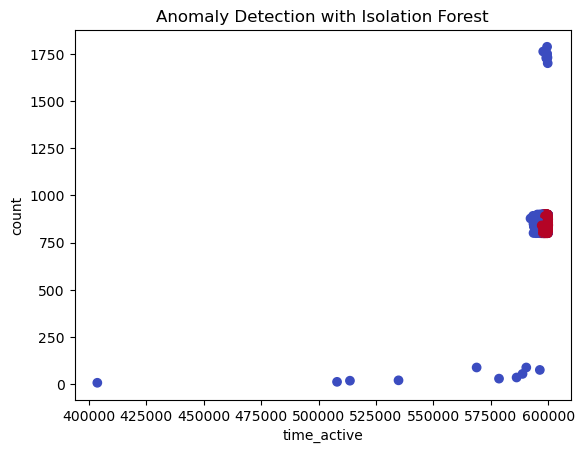

In [10]:
plt.scatter(features['time_active'], features['count'], c=l3_forest['anomaly'], cmap='coolwarm')
plt.xlabel('time_active')
plt.ylabel('count')
plt.title('Anomaly Detection with Isolation Forest')
plt.show()

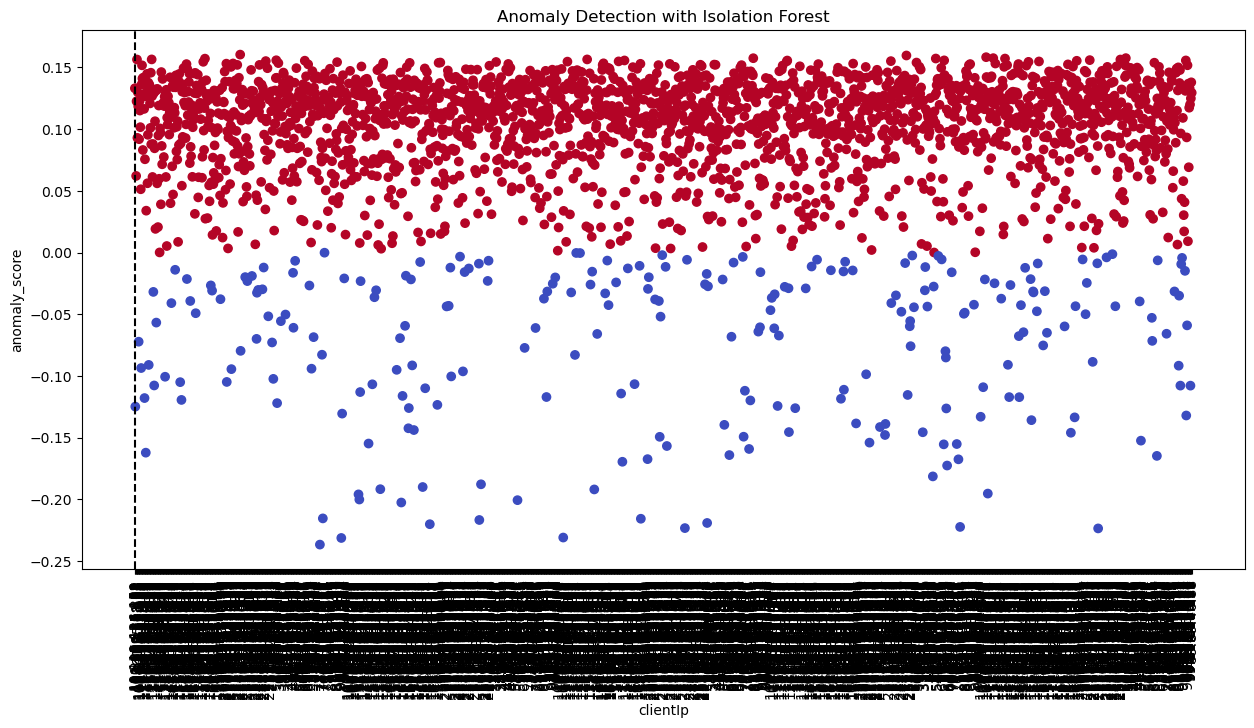

In [16]:
plt.figure(figsize=(15,7))

plt.scatter(l3_forest['clientIp'], l3_forest['anomaly_score'], c=l3_forest['anomaly'], cmap='coolwarm')

plt.xlabel('clientIp')
plt.ylabel('anomaly_score')
plt.title('Anomaly Detection with Isolation Forest')

plt.xticks(rotation=90)
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

In [62]:
client_ratings = pd.DataFrame({
    'clientId': [],
    'anomaly_median': [],
    'mean_anomaly_score': []
})

for client in l3_forest['clientIp'].unique():
    l3_forest_filtered = l3_forest[l3_forest['clientIp'] == client]
    line = {
        'clientId': client,
        'anomaly_median': l3_forest_filtered['anomaly'].median(),
        'mean_anomaly_score': l3_forest_filtered['anomaly_score'].mean()
    }
    client_ratings.loc[len(client_ratings)] = line
    
client_ratings
    

,clientId,anomaly_median,mean_anomaly_score
0,104.215.18.178,1.0,0.048456
1,110.193.215.48,1.0,0.024585
2,110.251.240.42,1.0,0.030112
3,115.147.226.201,1.0,0.042138
4,115.239.140.6,1.0,0.043792
...,...,...,...
95,47.53.203.34,1.0,0.028907
96,201.58.7.103,-1.0,-0.011463
97,22.46.254.12,1.0,0.040410
98,31.180.185.64,0.0,0.008684


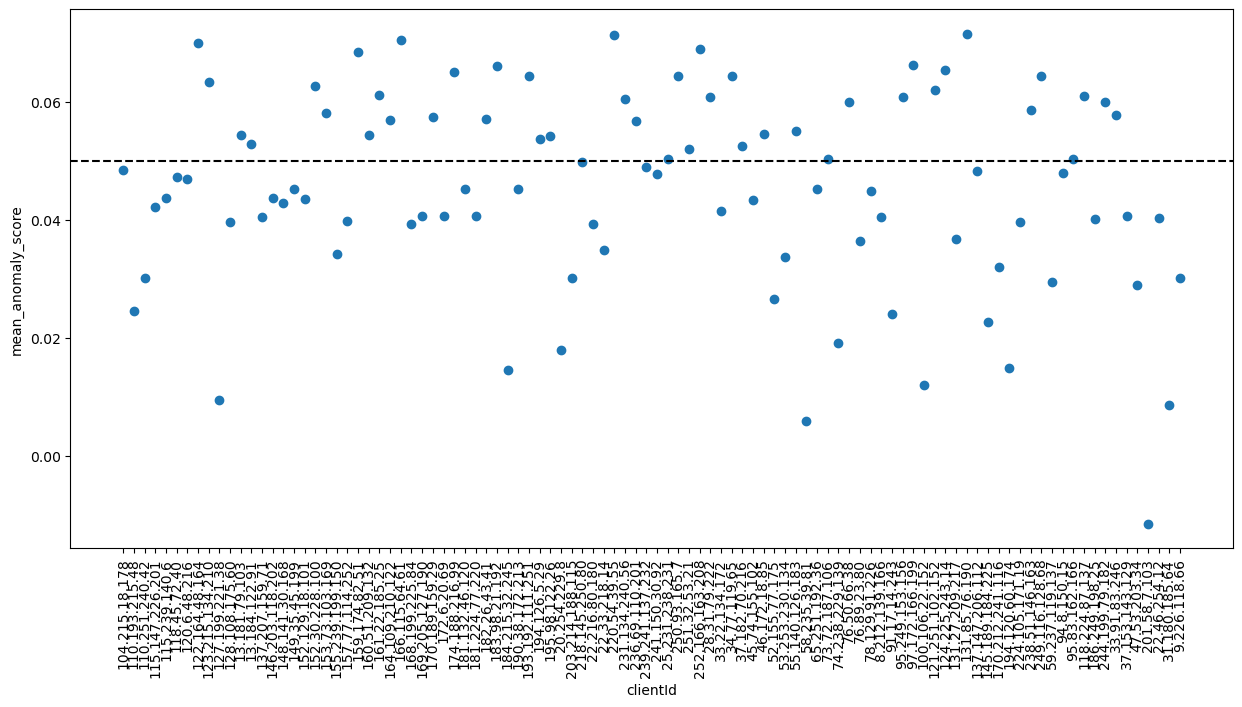

In [65]:
plt.figure(figsize=(15,7))

plt.scatter(client_ratings['clientId'], client_ratings['mean_anomaly_score'])

plt.xlabel('clientId')
plt.ylabel('mean_anomaly_score')
plt.xticks(rotation=90)
plt.axhline(0.05, color='black', linestyle='--')
plt.show()